# Titanic (Machine Learning from Disaster) - Análise Exploratória dos Dados
## Contexto

### 📌 Objetivos do EDA:
* Entender a estrutura e qualidade dos dados
* Identificar variáveis importantes
* Detectar outliers, valores ausentes e distribuições
* Formular hipóteses

In [21]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches


from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap
import warnings

warnings.filterwarnings("ignore")

color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF", 
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

# Definir cores
color_binary = {
    0: color_palette21[-7],  # Vermelho para não sobreviveu
    1: color_palette21[3]   # Azul para sobreviveu
}

sns.set_palette(sns.color_palette(color_palette21))
sns.color_palette(color_palette21)


[(0.0, 0.2980392156862745, 0.2980392156862745),
 (0.0, 0.4, 0.4),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.09803921568627451, 0.5686274509803921, 0.5686274509803921),
 (0.1607843137254902, 0.6392156862745098, 0.6392156862745098),
 (0.25098039215686274, 0.7098039215686275, 0.7098039215686275),
 (0.3333333333333333, 0.7803921568627451, 0.7803921568627451),
 (0.4, 0.8509803921568627, 0.8509803921568627),
 (0.5019607843137255, 0.9254901960784314, 0.9254901960784314),
 (0.6, 1.0, 1.0),
 (1.0, 0.8352941176470589, 0.5019607843137255),
 (1.0, 0.7686274509803922, 0.3764705882352941),
 (1.0, 0.6980392156862745, 0.25098039215686274),
 (1.0, 0.6274509803921569, 0.12549019607843137),
 (1.0, 0.5568627450980392, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (1.0, 0.39215686274509803, 0.0),
 (1.0, 0.2980392156862745, 0.0),
 (1.0, 0.2, 0.0),
 (1.0, 0.10196078431372549, 0.0),
 (1.0, 0.0, 0.0)]

---
## 2. Dataload & Pré-visualização dos Dados 🗂️

In [2]:
# Carregando os dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Titanic/data/raw/train.csv")
df=dfo.drop(columns='PassengerId')
NC=df.shape[1]
inital_describe(df,True)
df.describe()

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 891 linhas
   • 11 colunas
   • Total de células: 9801

🔧 TIPOS DE DADOS:
   • object: 5 colunas
   • int64: 4 colunas
   • float64: 2 colunas

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 866
   • Percentual: 8.84%

📊 COLUNAS COM VALORES NULOS:
   • Age: 177 nulos (19.87%)
   • Cabin: 687 nulos (77.10%)
   • Embarked: 2 nulos (0.22%)

✅ ANÁLISE CONCLUÍDA


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.1 Pré-visualização dos Dados 🗂️
#### A. Percentual de Sobreviventes

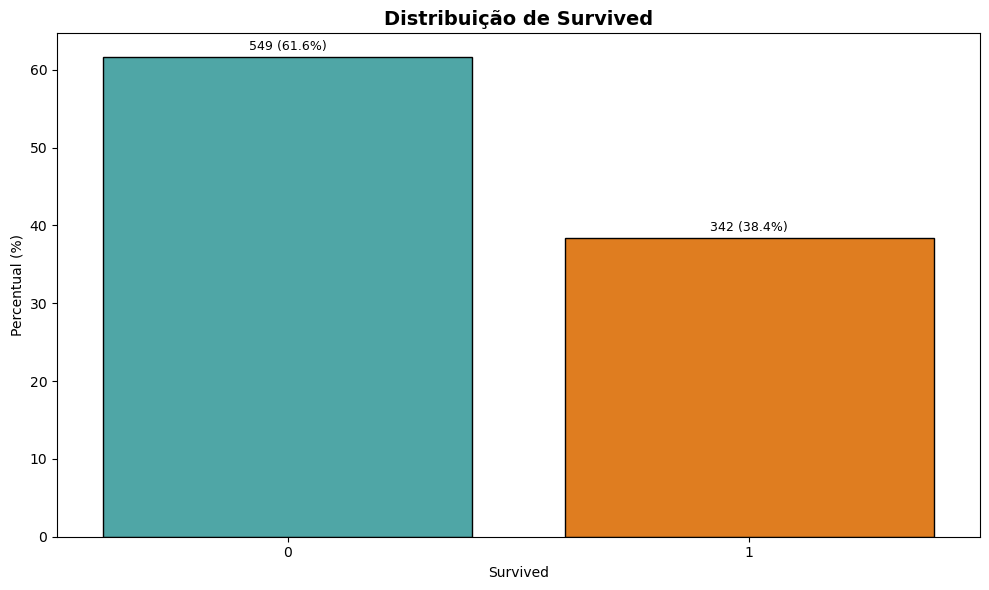

In [3]:
stats1 = bar_bar_cat(df,'Survived',h=6)

#### B. Percentual de Sobreviventes/Sexo

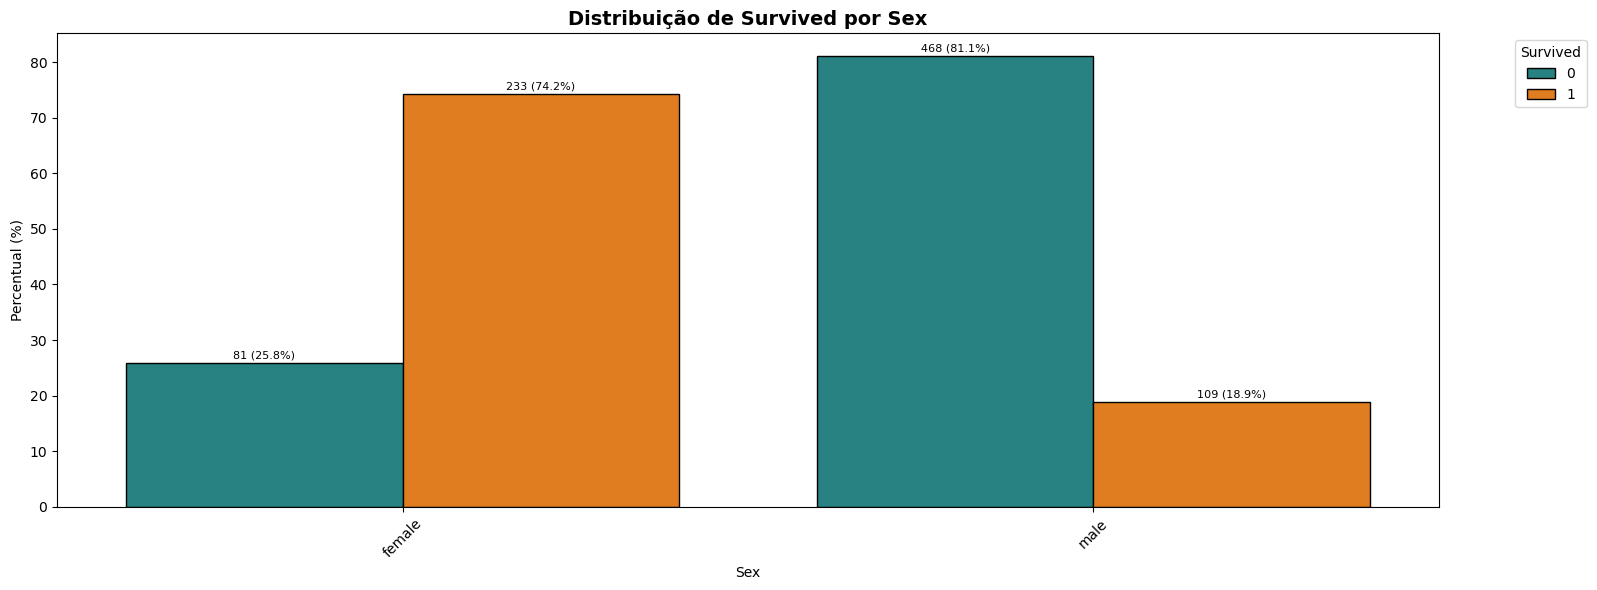

In [4]:
stats1= bar_bar_cat(df,'Sex','Survived',h=6)

#### C. Percentual de Sobreviventes por classe

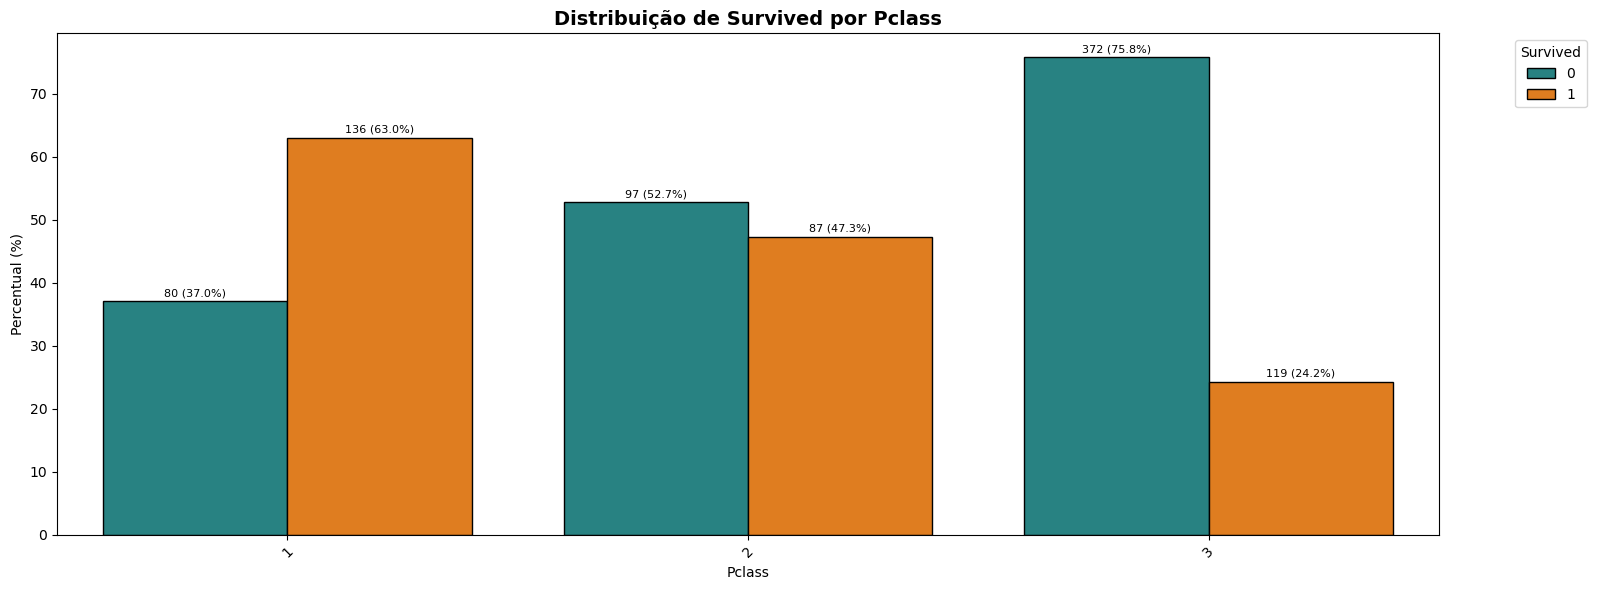

In [5]:
stats1= bar_bar_cat(df,'Pclass','Survived',h=6)

#### D. Percentual de Sobreviventes por Local de Embarque

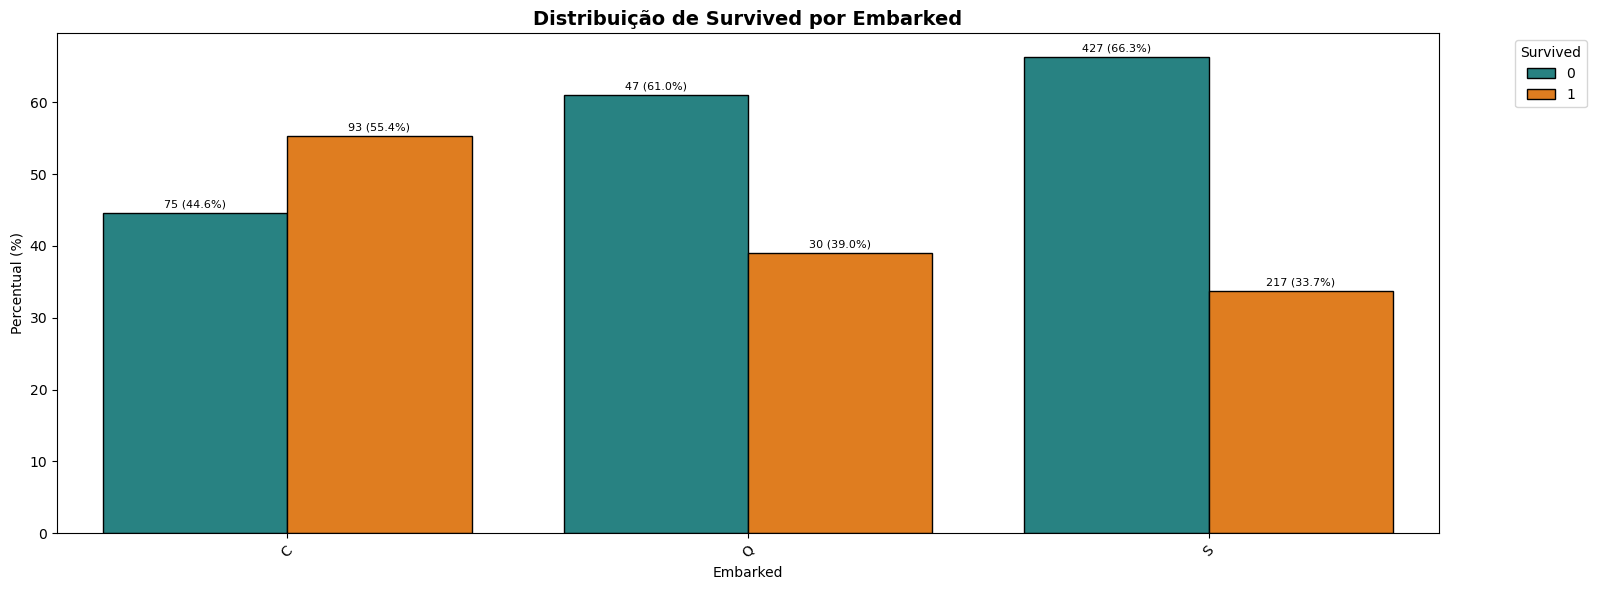

In [6]:
stats1= bar_bar_cat(df,'Embarked','Survived',h=6)

#### E. Percentual de Sobreviventes por ter Cabine

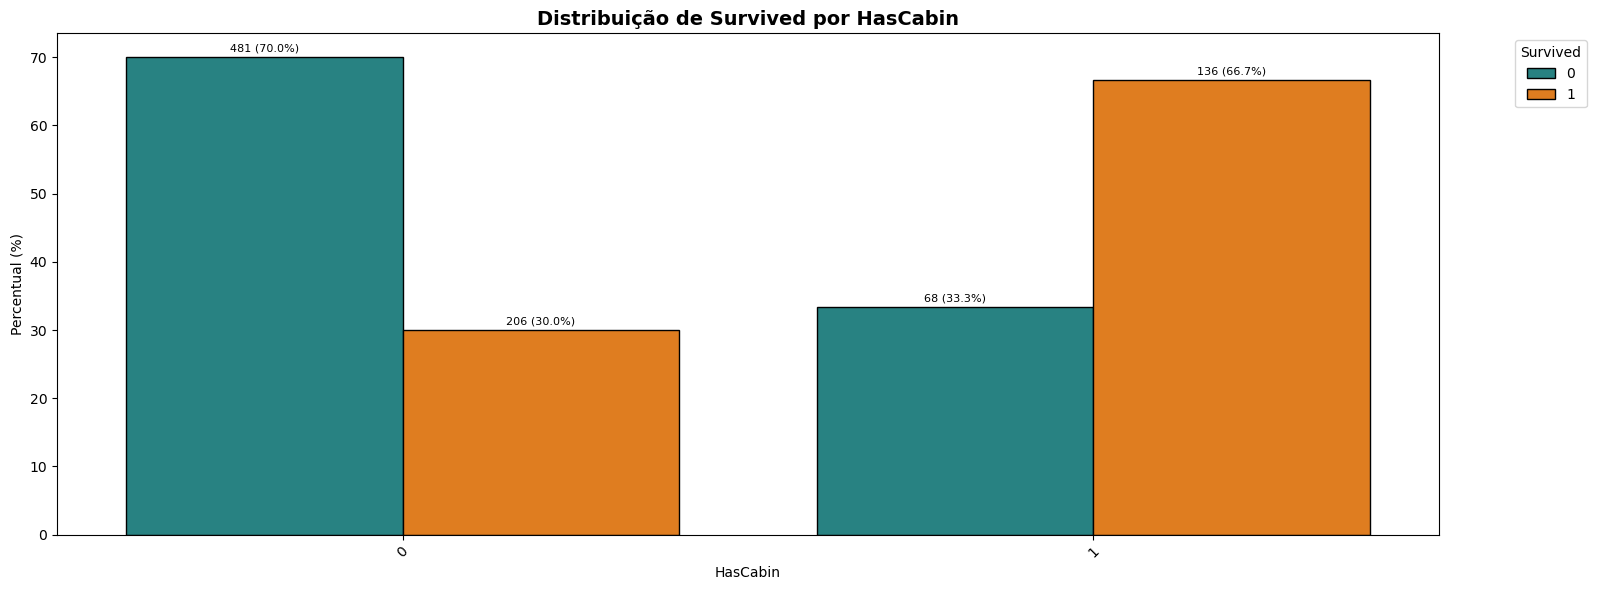

In [7]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
stats1= bar_bar_cat(df,'HasCabin','Survived',h=6)


#### F. Percentual de Sobreviventes por faixa etária

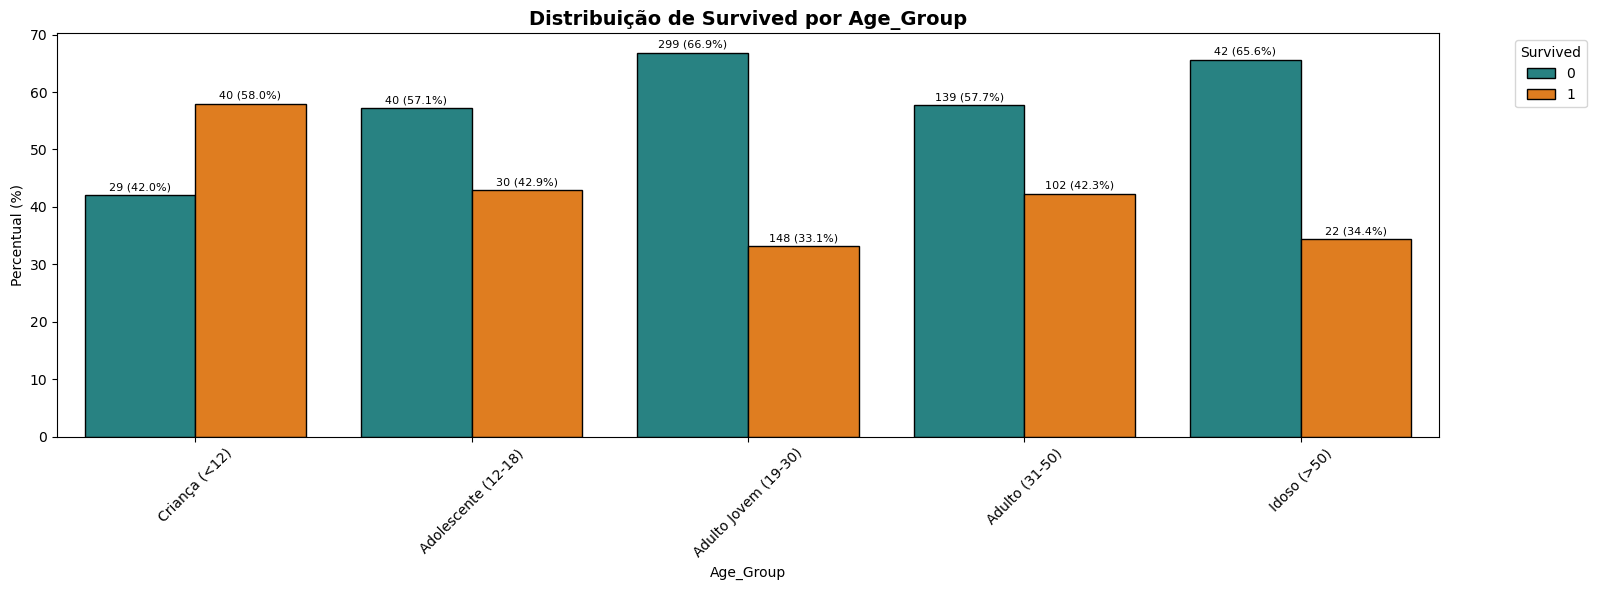

In [43]:
# Criar bins de idade

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], 
                         labels=['Criança (<12)', 'Adolescente (12-18)', 
                                 'Adulto Jovem (19-30)', 'Adulto (31-50)', 
                                 'Idoso (>50)'])

stats1= bar_bar_cat(df,'Age_Group','Survived',h=6)

#### G. Percentual de Sobreviventes por Tamanho da familia

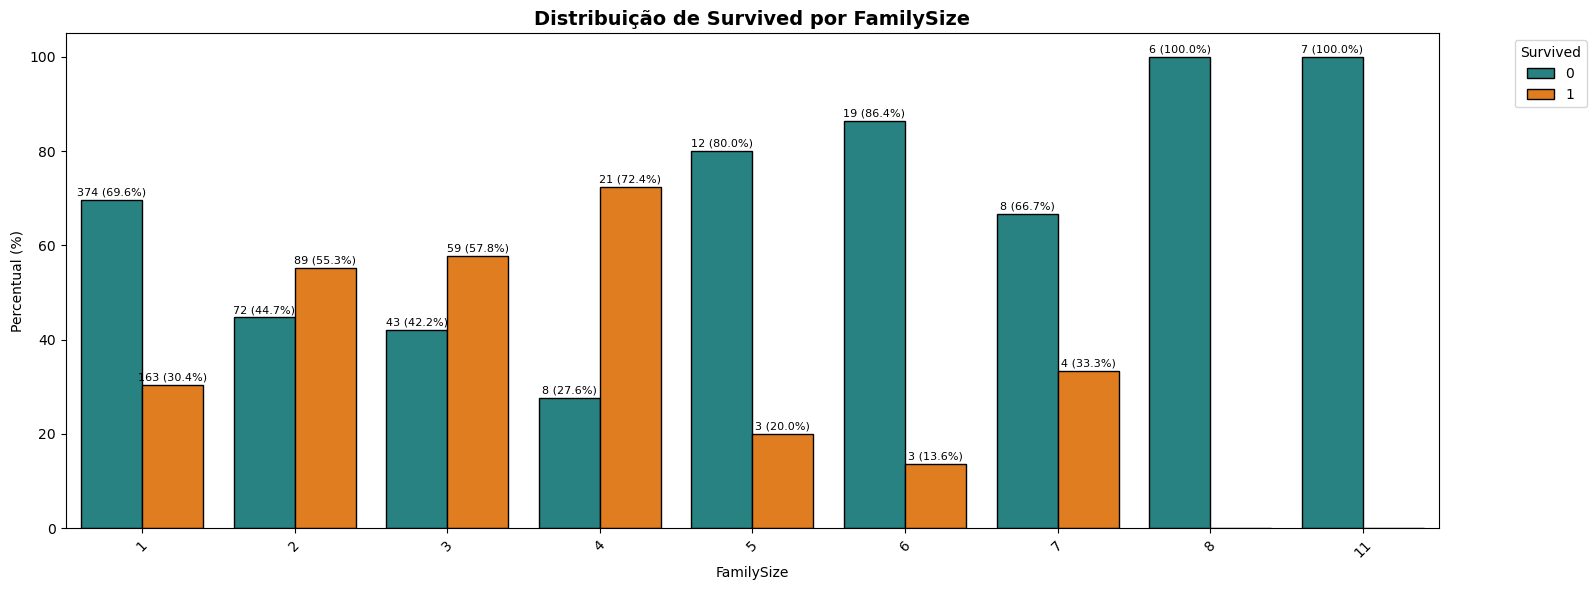

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
stats1= bar_bar_cat(df,'FamilySize','Survived',h=6)

#### 3.Dispersão e distribuição

0 0
1 1


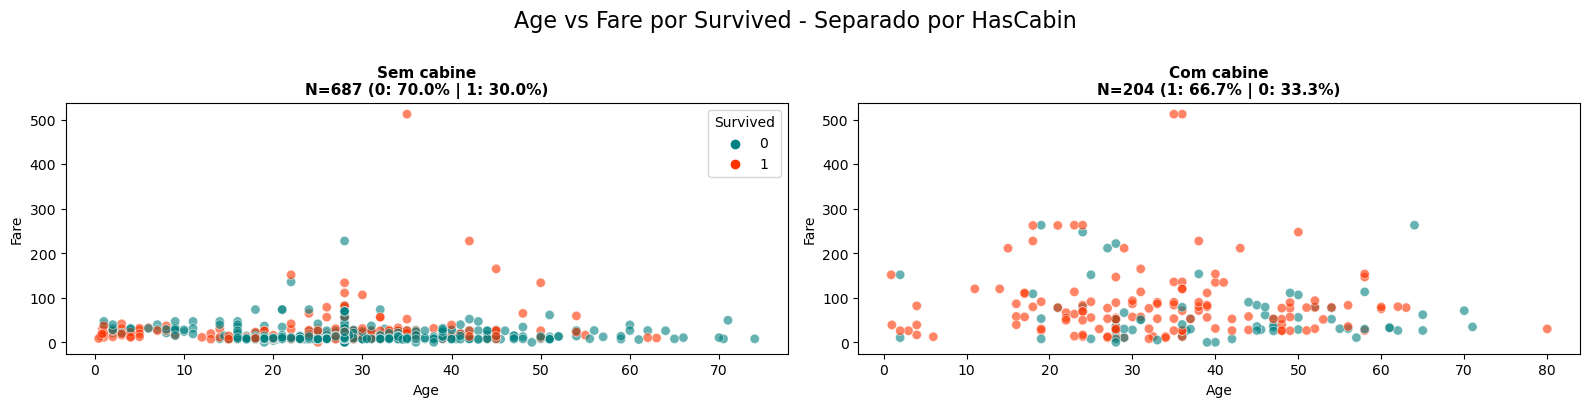

0 0
1 1


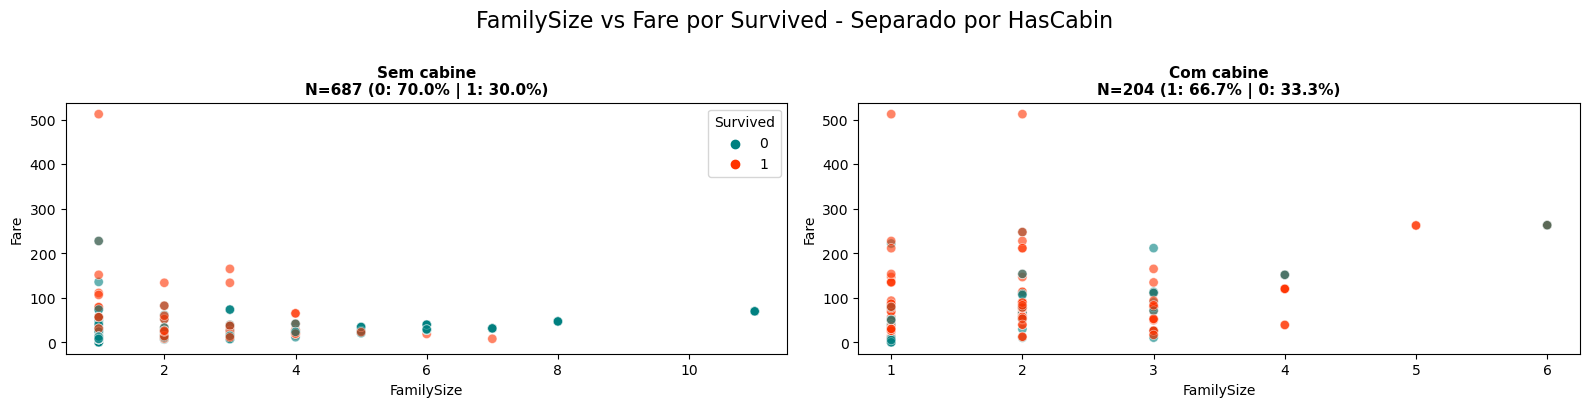

0 Adulto Jovem (19-30)
1 Adulto (31-50)
2 Idoso (>50)
3 Criança (<12)
4 Adolescente (12-18)


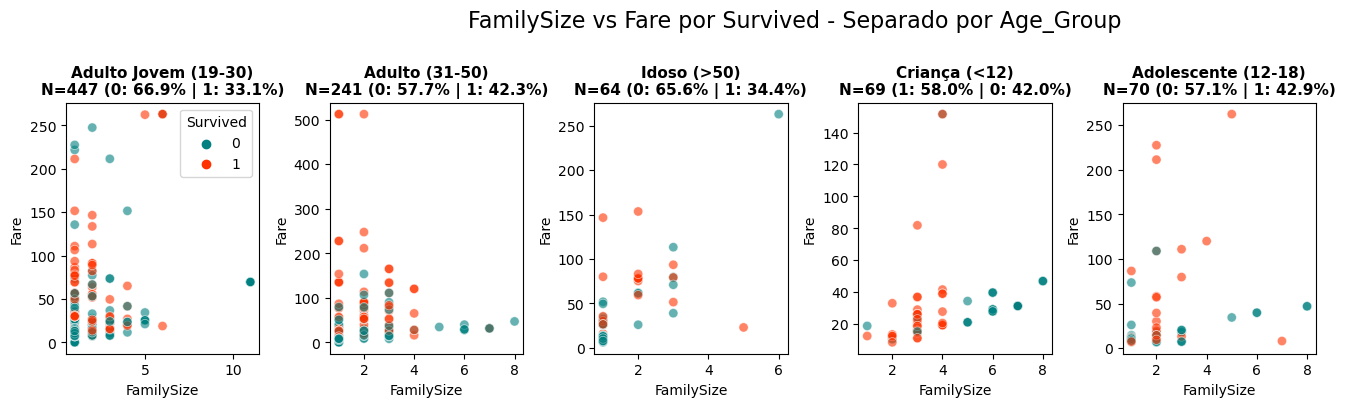

In [44]:
out1=scatter_by_category(df,'Age','Fare',
    hue_var='Survived',category_var='HasCabin',
    ncols=2,category_name=['Sem cabine','Com cabine'])

out1=scatter_by_category(df,'FamilySize','Fare',
    hue_var='Survived', category_var='HasCabin',
    ncols=2,category_name=['Sem cabine','Com cabine'])



out1=scatter_by_category(df,'FamilySize','Fare',
    hue_var='Survived', category_var='Age_Group',
    ncols=6)

In [42]:
df['Age']

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64